# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 65.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 34.0MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/train.csv')

In [9]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [10]:
#Let's look at our data and make sure everything is in order
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
#Checking for missing values (NaNs)
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


At first glance, it appears that we have no missing values in our dataset. However, later in my analysis, I noticed that something was odd about the total time spent variable (which is coded as 'object' type and may have sever types of variables). Let's check if there are any missing values that are coded as empty spaces instead of NaNs.

In [12]:
data[data == ' '].count()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Now I see that there are actually 9 missing values in the variable "TotalSpent". After studying the data, I notice that Total Spending only starts accumulating from ClientPeriod = 1 onwards. This may be down to the way that communication providers calculate cumulative spending; they may start counting total amount spent only once the customer has been with the company for a certain period of time. Indeed, I see that for customers with ClientPeriod = 1, the TotalSpent is exactly equal to MonthlySpending. Perhaps 1 month is the threshold the firm use to start calculating total spending. Therefore, the firms seem to ignore the expenditure that customers incurr in the very first period of their contract. For consistency, I will replace the nince missing values with 0s.

Upon investigating ClientPeriod = 1, I also identified several duplicate entries. Below, I will check for any other duplicates.

In [45]:
#Filling in the blancs
data.loc[data['TotalSpent'] == ' ', 'TotalSpent'] = 0

In [49]:
#Checking for duplicate entries
data.duplicated().sum()

14

In [50]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1.1 Numerical Features

In [52]:
sns.set_theme(style="whitegrid")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlineTV  

In [54]:
data['TotalSpent'].dtype

dtype('float64')

In [55]:
#Before dealing with missing values TotalSpent was of object type, let's change it to float
data['TotalSpent'] = data['TotalSpent'].astype(float)

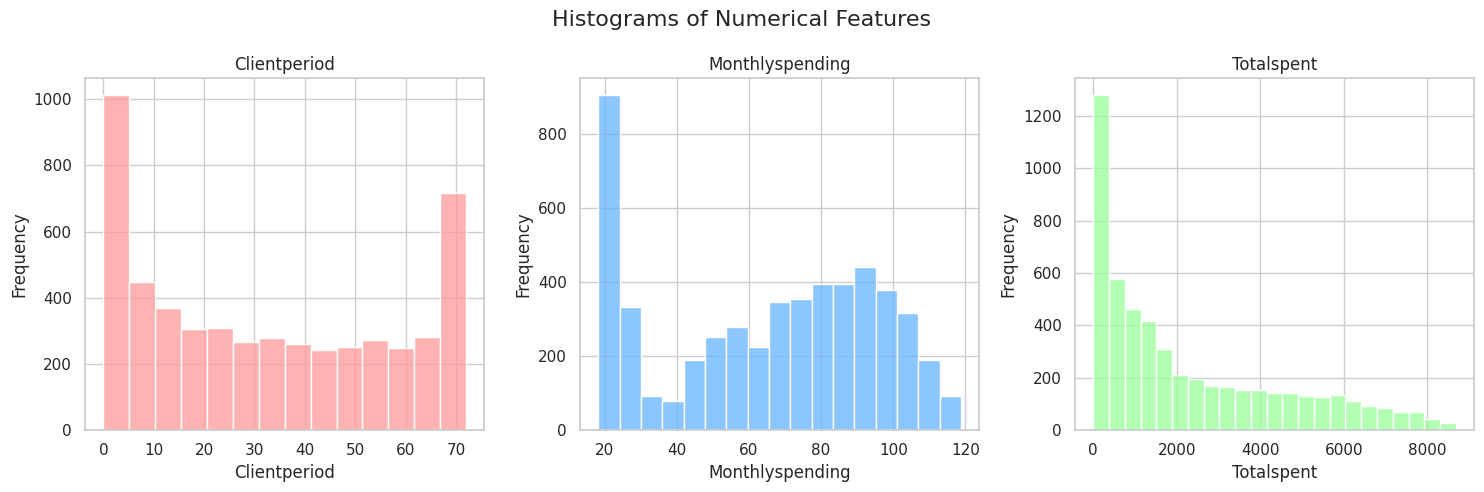

In [56]:
#plotting histograms for numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

palette = ['#FF9999', '#66B3FF', '#99FF99']

for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axs[i], color=palette[i])
    axs[i].set_title(f'{col.capitalize()}')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Frequency')

plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

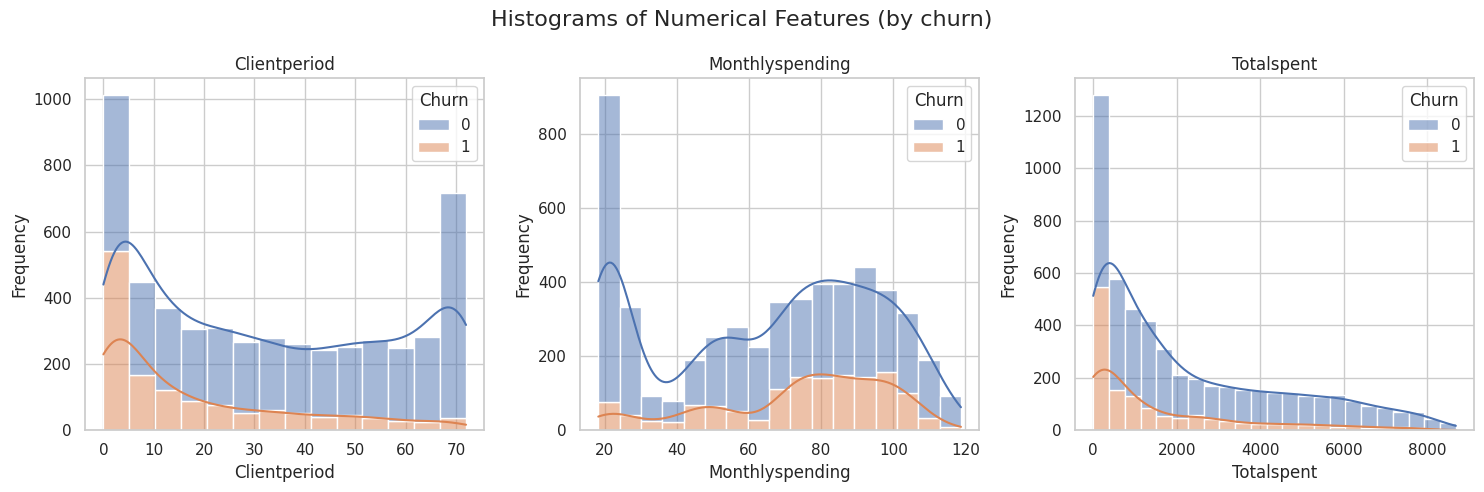

In [57]:
#plotting histograms for numerical features (by churn outcomes)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.histplot(data=data, x=col, ax=axs[i], hue='Churn', multiple='stack', kde=True)
    axs[i].set_title(f'{col.capitalize()}')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Frequency')

plt.suptitle('Histograms of Numerical Features (by churn)', fontsize=16)
plt.tight_layout()
plt.show()

It is clearly visible that those customers who (eventually) churn have a relatively lower clientperiod count as compared to those who do not churn. This is evident from the right-skewed distribution of the customers that churned. However, this pattern is not reflected in the distribution of client periods for the customers that did not churn.

There are no notable difference in the other distributions with the exception of the distinctively large number of customers spending the smallest amount on monthly bills among those who did not churn. This is not the case among those that churn.

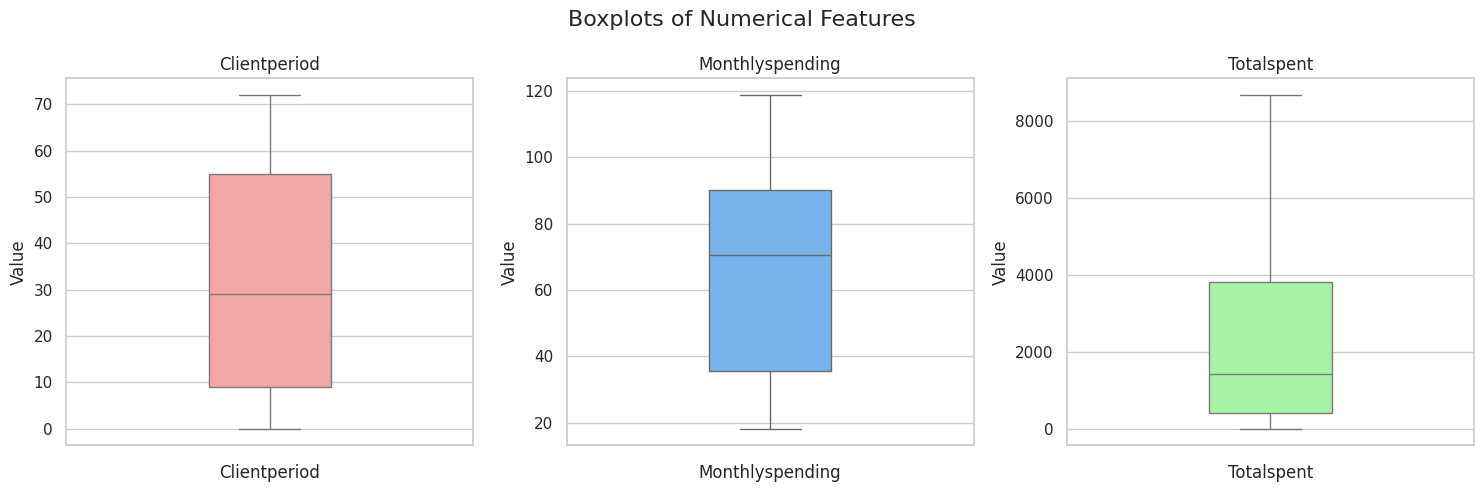

In [58]:
#plotting boxplots for numerical features

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

palette = ['#FF9999', '#66B3FF', '#99FF99']

for i, col in enumerate(num_cols):
    sns.boxplot(data=data, y=col, ax=axs[i], color=palette[i], width=0.3)
    axs[i].set_title(f'{col.capitalize()}')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Value')

plt.suptitle('Boxplots of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

### 1.2 Categorical Features

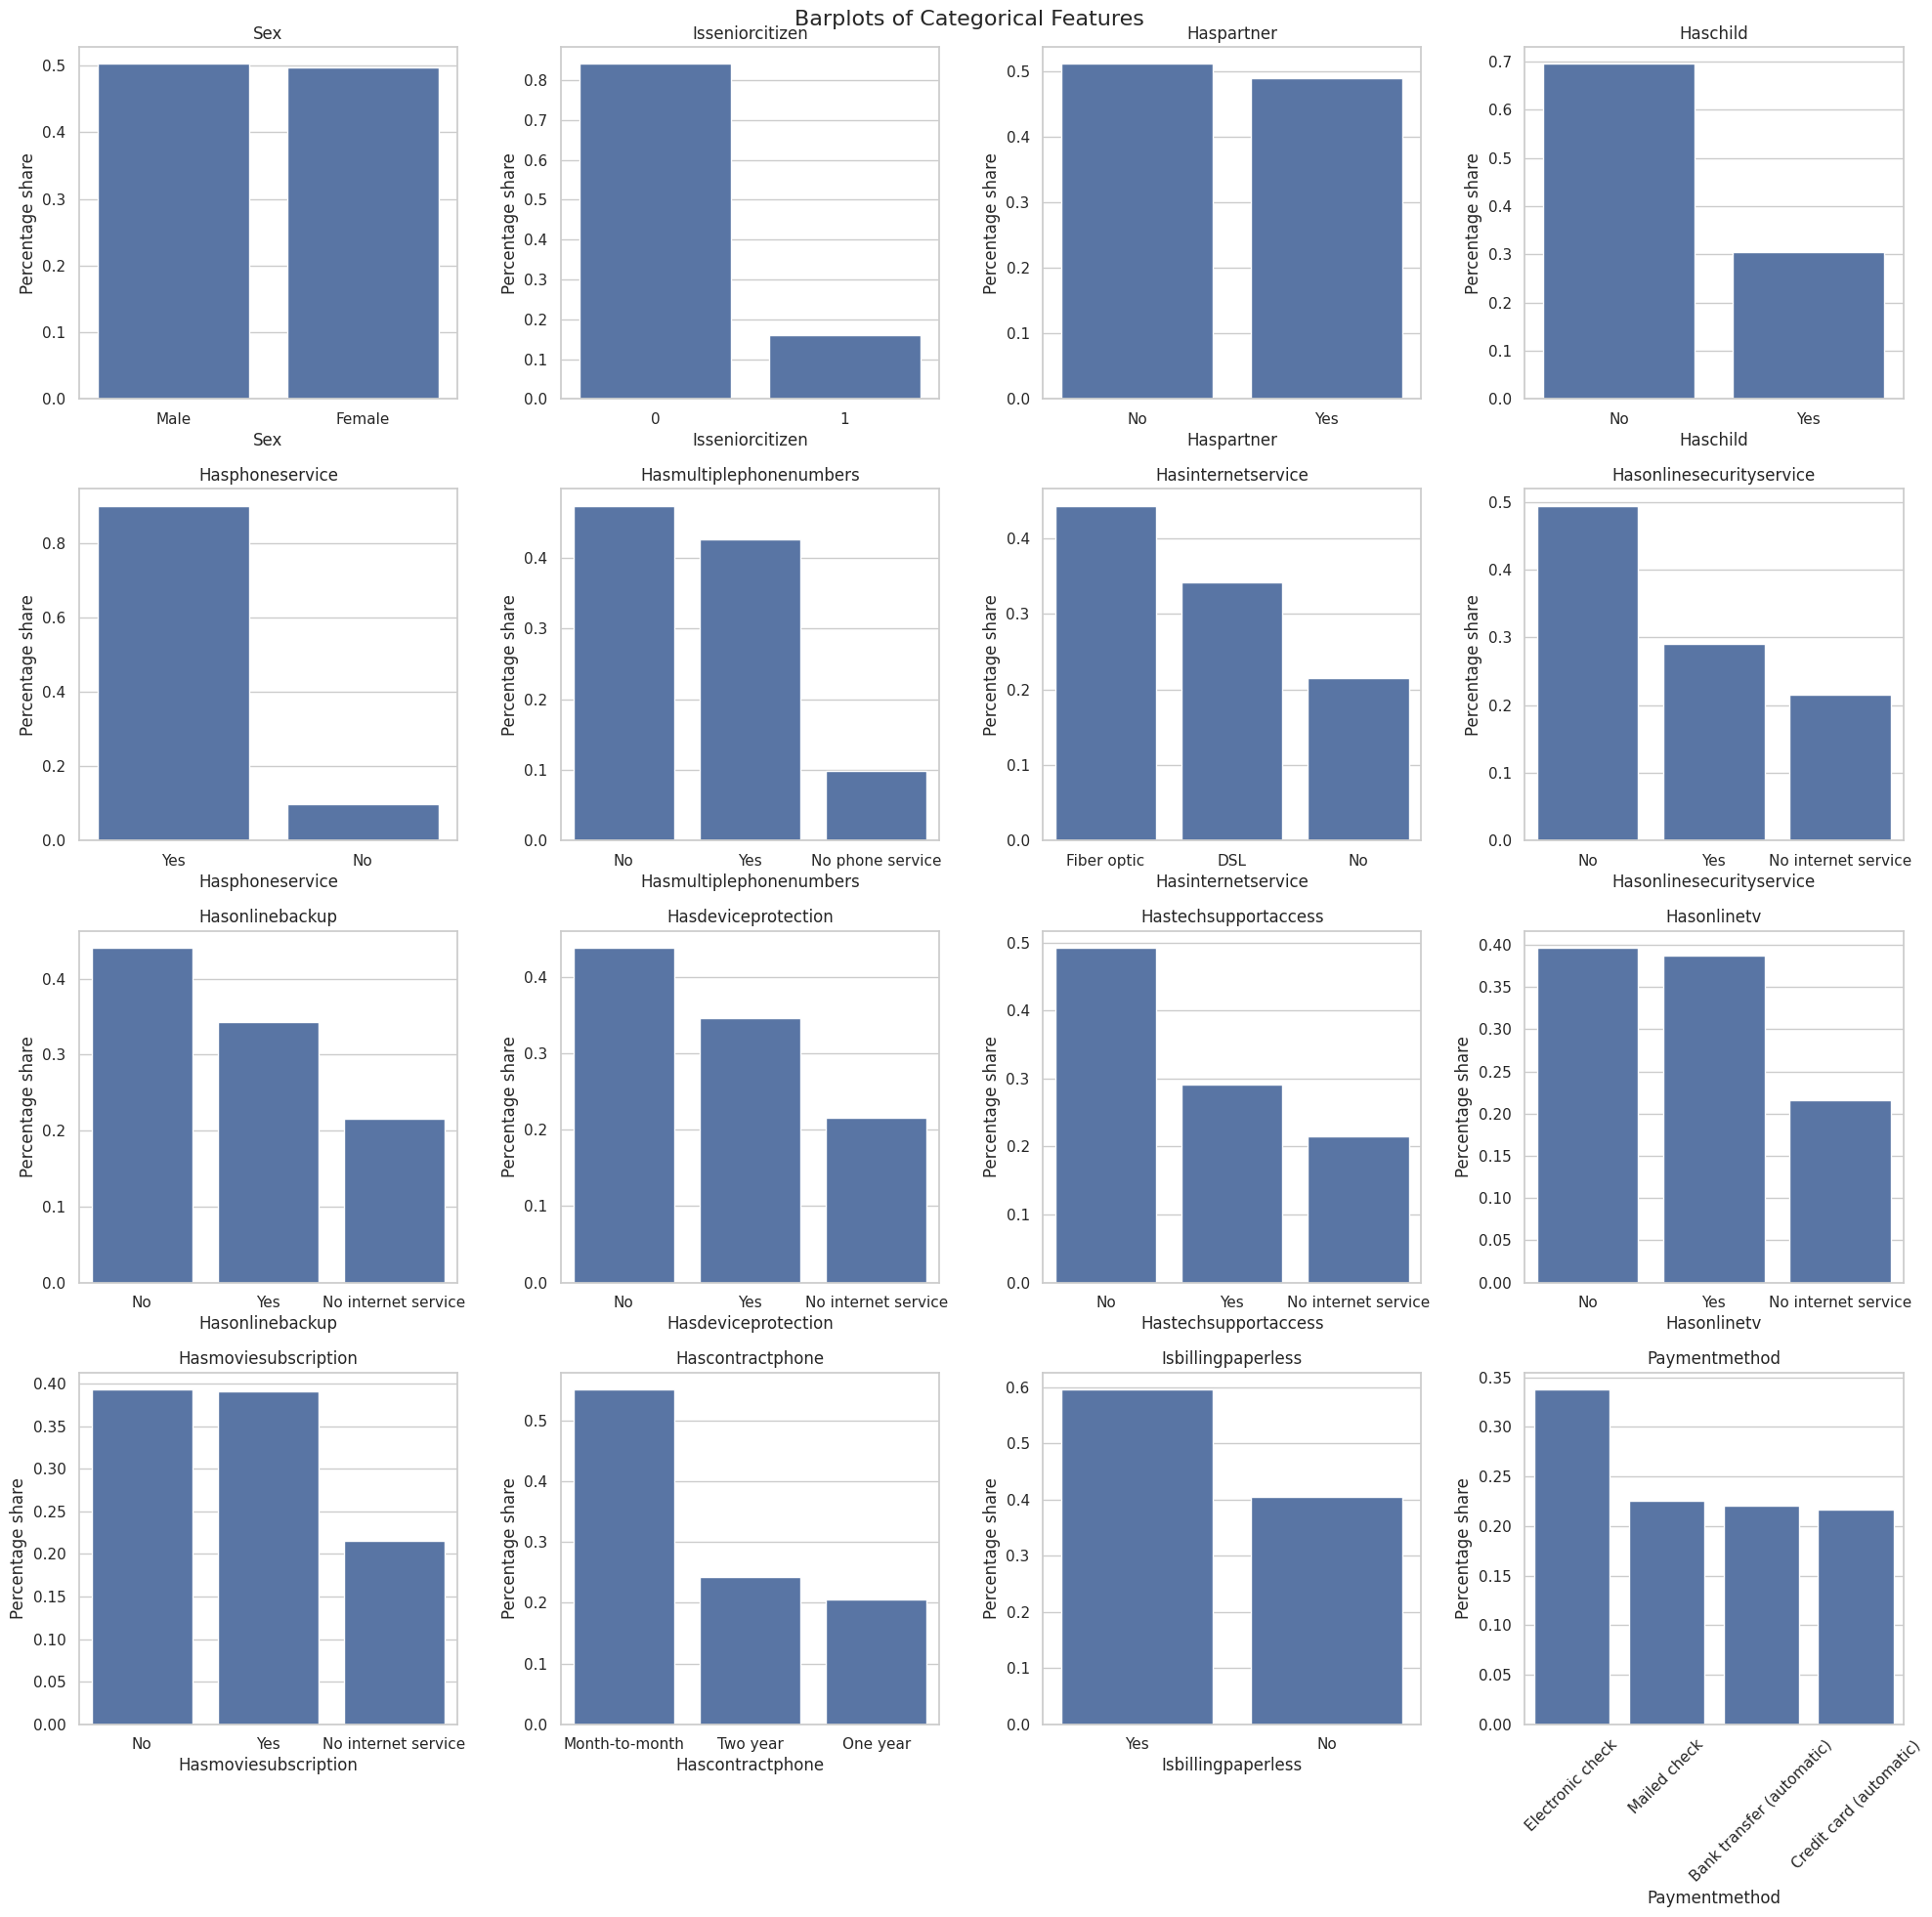

In [59]:
#Plotting barplots of categorical features
fig, axs = plt.subplots(4,4, figsize=(20, 20))

for i, col in enumerate(cat_cols):

    row_index = i // 4
    col_index = i % 4

    sns.barplot(x=data[col].value_counts().index, y=(data[col].value_counts().values / len(data[col])) , ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(f'{col.capitalize()}')
    axs[row_index, col_index].set_xlabel(col.capitalize())
    axs[row_index, col_index].set_ylabel('Percentage share')

    axs[3,3].tick_params(axis='x', rotation=45)

plt.suptitle('Barplots of Categorical Features', fontsize=16)
plt.tight_layout()
plt.show()

### 2 Distribution of Target Variable

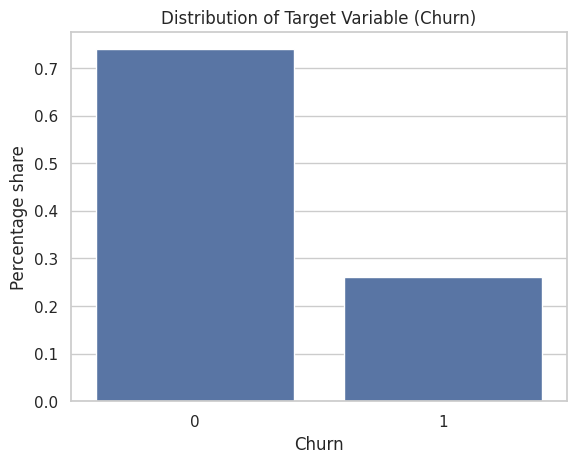

In [60]:
#Checking the distribution of the target variable
sns.barplot(x=data['Churn'].value_counts().index, y=(data['Churn'].value_counts().values / len(data['Churn'])))
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Percentage share')
plt.show()

The classes are quite imbalanced with just over 70% of observation belonging to the no-churn class. I will try to address this problem later in my analysis.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [61]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold

In [62]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [63]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [65]:
#Start by making a transformer with One Hot Encoder and StandardScaler
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

#Making a pipeline with encoder, scaler and the logistic regression
pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('logistic_model', LogisticRegression())
])

#Setting the gridsearch parameters
parameters = {
    'logistic_model__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

#Setting stratified 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Preparing the CV Gridsearch with the above parameters
CV_model_logit = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

#Fitting the model
CV_model_logit.fit(X,y)
print("Best Cross-Validation Score:", CV_model_logit.best_score_)
print("Best Parameters:", CV_model_logit.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Cross-Validation Score: 0.8456713265194526
Best Parameters: {'logistic_model__C': 10}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Using Stratified 5-fold cross validation and Grid Search, I attain the average ROC-AUC score of 0.8457 with the best regularisation coefficient of C=10 (λ = 0.1).

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [66]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [67]:
import catboost

In [68]:
#Splitting my set into train and test sets
X_train_cboost, X_test_cboost, y_train_cboost, y_test_cboost = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [73]:
#Conducting grid search with stratified 5-fold cross validation for CatBoostClassifier
params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'l2_leaf_reg': [1, 3],
    'subsample': [0.8],
    'colsample_bylevel': [0.8]
}

#Instantiating the catboost classifier model
cboost_model = catboost.CatBoostClassifier(cat_features=cat_cols)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cboost_grid_cv = GridSearchCV(
    estimator=cboost_model,
    param_grid=params,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=5,
)

cboost_grid_cv.fit(X, y)
cboost_grid_cv.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0:	learn: 0.6571729	total: 9.82ms	remaining: 972ms
1:	learn: 0.6264219	total: 16ms	remaining: 786ms
2:	learn: 0.6005772	total: 25.2ms	remaining: 814ms
3:	learn: 0.5798011	total: 33.4ms	remaining: 802ms
4:	learn: 0.5608109	total: 41.6ms	remaining: 791ms
5:	learn: 0.5459489	total: 50ms	remaining: 783ms
6:	learn: 0.5331247	total: 59.2ms	remaining: 787ms
7:	learn: 0.5215257	total: 66.9ms	remaining: 770ms
8:	learn: 0.5094152	total: 73.1ms	remaining: 739ms
9:	learn: 0.4981152	total: 81.9ms	remaining: 737ms
10:	learn: 0.4899526	total: 86.1ms	remaining: 697ms
11:	learn: 0.4811995	total: 93.6ms	remaining: 687ms
12:	learn: 0.4741456	total: 103ms	remaining: 689ms
13:	learn: 0.4678336	total: 110ms	remaining: 678ms
14:	learn: 0.4628562	total: 118ms	remaining: 671ms
15:	learn: 0.4570236	total: 125ms	remaining: 655ms
16:	learn: 0.4518499	total: 134ms	remaining: 654ms
17:	learn: 0.4473715	total: 141ms	remaining: 644ms
18:	learn: 0.4433060	to

In [74]:
y_train_pred = cboost_grid_cv.predict_proba(X_train_cboost)[:, 1]
y_test_pred = cboost_grid_cv.predict_proba(X_test_cboost)[:, 1]

In [75]:
print(f'Train ROC-AUC: {roc_auc_score(y_train_cboost, y_train_pred)}')
print(f'Test ROC-AUC: {roc_auc_score(y_test_cboost, y_test_pred)}')

Train ROC-AUC: 0.852557554025444
Test ROC-AUC: 0.8644648982202032


In [76]:
cboost_grid_cv.best_params_

{'colsample_bylevel': 0.8,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.8}

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

I attained the highest ROC-AUC score of 0.8645 on the test-set using the learning rate of 0.1 and 100 decision tree estimators. I added several other parameters to see how far I could improve the model.

In the end, the two models come quite close in terms of the ROC-AUC score.
One advantage that Logistic Regression enjoys over the CatBoost classifier is that it accesses additional information from the 3 numerical variables (TotalSpent, MonthlySpending and ClientPeriod), while Catboost only works with categorical features. In fact, based on the previous observations (see the histograms above) the  ClientPeriod feature probably carries some rather meaningful predictive power.

# Предсказания

In [44]:
#Logistic regression
best_model = CV_model_logit.best_estimator_

In [45]:
submission = pd.read_csv('/content/submission.csv')
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [46]:
submission = pd.read_csv('/content/submission.csv', index_col='Id')
submission

,Churn
Id,
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5
...,...
1756,0.5
1757,0.5
1758,0.5


In [47]:
X_test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv', index_col='Id')
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = 0

submission['Churn'] = best_model.predict_proba(X_test)[:,1]# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

In [48]:
submission

,Churn
Id,
0,0.040148
1,0.720790
2,0.694970
3,0.005737
4,0.001415
...,...
1756,0.098476
1757,0.027443
1758,0.762763


### Also for Catboost

In [79]:
best_model_cboost = cboost_grid_cv.best_estimator_
X_test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv', index_col='Id')
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = 0

submission['Churn'] = best_model_cboost.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission2.csv')



In [80]:
submission

,Churn
Id,
0,0.047928
1,0.631913
2,0.682470
3,0.020498
4,0.011252
...,...
1756,0.117985
1757,0.018680
1758,0.820469


Лучшее решение отправьте в Stepik.